# Assignment 2 by: Deepthi Suresh (S3991481)


# Task 1: Regression


In [4]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv("A2data.csv",sep=';',decimal='.',header=0) # reading the file into python

In [6]:
data.head(5) #ensuring the file is read correctly

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [7]:
data.shape 

(4781, 12)

In [8]:
data.dtypes #checking the data types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
data = data.apply(pd.to_numeric,errors='coerce') # converting all columns to numeric

In [10]:
data.dtypes #checking the data types conversion

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
data.isna().sum() #checking for missing values in the data

fixed acidity           0
volatile acidity        1
citric acid             5
residual sugar          7
chlorides               1
free sulfur dioxide     4
total sulfur dioxide    4
density                 8
pH                      1
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [12]:
data = data.dropna() # dropping all the rows with the missing values

In [13]:
data.isna().sum() #checking if all missing values are handled

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
data.describe().round(2) # Descriptive statistics for the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4748.00,4748.00,4748.00,4748.00,4748.00,4748.00,4748.00,4748.00,4748.00,4748.00,4748.00,4748.00
mean,6.86,0.28,0.33,6.41,0.05,35.32,138.49,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.08,0.02,17.05,42.64,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.25,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [15]:
sample_1 = data.sample(n= 200,random_state=1) # Creating a random sample of 200 observations

In [16]:
sample_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2422,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5
4226,6.0,0.330,0.26,5.1,0.051,16.0,119.0,0.99416,3.15,0.41,9.2,5
1240,7.3,0.180,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.4,6
2547,6.6,0.240,0.24,8.6,0.034,25.0,135.0,0.99582,3.33,0.59,10.3,6
2795,6.3,0.250,0.22,3.3,0.048,41.0,161.0,0.99256,3.16,0.50,10.5,6


In [17]:
sample_1.shape # Checking the no of observations

(200, 12)

In [18]:
sample_1.isna().sum() #checking if all missing values are handled

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
sample_1.to_csv('S3991481-A2SampleOne.csv',index=False) #Exporting the sample into a csv file

Text(0.5, 1.0, 'Boxplot for Density')

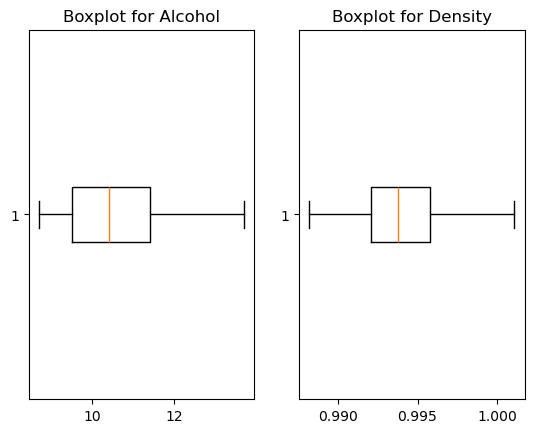

In [20]:
# creating a boxplot to check for any outliers
plt.subplot(1, 2, 1)
plt.boxplot(sample_1['alcohol'], vert=False)
plt.title('Boxplot for Alcohol')

plt.subplot(1, 2, 2)
plt.boxplot(sample_1['density'], vert=False)
plt.title('Boxplot for Density')

Text(0.5, 1.0, 'Scatter plot of density and Alcohol')

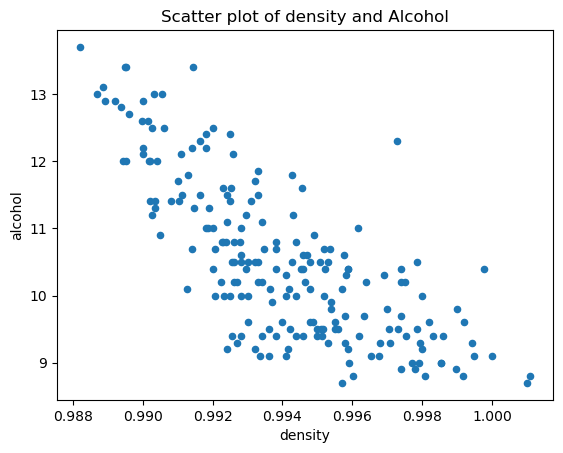

In [21]:
# creating a scatter plot to show the relationship between the two variables
sample_1.plot(kind='scatter', y='alcohol', x='density') 
plt.title('Scatter plot of density and Alcohol')

In [22]:
#Developing the Linear Model using Scikit 

In [23]:
#To Create a Linear Model, alcohol is the dependent variable (y) and density is the independent variable (X)
y = sample_1["alcohol"]
X = sample_1[["density"]]

#Standardising the X value since density and alcohol has differnet units
scaler = StandardScaler()
X_standardised= scaler.fit_transform(X)


# Splitting the data into Training and testing data. here 25% of the data is considered for testing.
X_train, X_test, y_train, y_test = train_test_split(X_standardised,y,test_size=0.25,random_state=55)

#Training the Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#print(regressor.intercept_, regressor.coef_)
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_}")

Intercept: 10.525376149887185
Coefficient: [-0.87658696]


In [24]:
#Predicting and Evaluating the Model Performance
y_pred = regressor.predict(X_test)

#Evaluating the Model Performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared : {r2:.2f}")
print(f"Mean Squared Error : {mse:.2f}")

R-squared : 0.68
Mean Squared Error : 0.52


Text(0, 0.5, 'Alcohol')

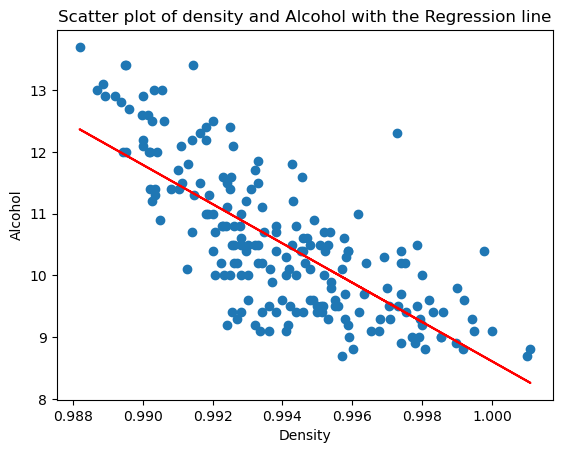

In [25]:
#Creating the linear regression equation
y_hat = regressor.intercept_ + (regressor.coef_*X_standardised)

#Plotting the regression model and regression line
plt.scatter(X,y)
plt.plot(X,y_hat,c='red')
plt.title('Scatter plot of density and Alcohol with the Regression line')
plt.xlabel('Density')
plt.ylabel('Alcohol')

# Task 2: Classification

In [27]:
sample_2 = data.sample(n= 500,random_state=1234546) # Creating a random sample of 500 observations sample_2 = data.sample(n= 1000,random_state=1234546)

In [28]:
sample_2.isna().sum() # Checking if the sample data has missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
sample_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3998,5.9,0.25,0.27,1.5,0.029,37.0,81.0,0.98920,3.20,0.46,12.20,6
414,7.1,0.31,0.47,13.6,0.056,54.0,197.0,0.99780,3.10,0.49,9.30,5
869,6.8,0.23,0.29,12.2,0.035,38.0,236.0,0.99760,3.35,0.52,9.80,6
4661,5.3,0.40,0.25,3.9,0.031,45.0,130.0,0.99072,3.31,0.58,11.75,7
2441,7.0,0.26,0.26,10.8,0.039,37.0,184.0,0.99787,3.47,0.58,10.30,7


In [30]:
sample_2.shape

(500, 12)

In [31]:
sample_2.to_csv('S3991481-A2SampleTwo_draft.csv',index=False) #Exporting the sample into a csv file

## kNN

In [33]:
#Importing packages
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [34]:
#Getting the column names
sample_2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
data.value_counts(['quality'])

quality
6          2117
5          1418
7           852
8           175
4           161
3            20
9             5
dtype: int64

In [36]:
sample_2.value_counts(['quality'])

quality
6          218
5          151
7           93
4           18
8           18
3            2
dtype: int64

In [37]:
# Creating the target using the Quality column
sample_2.target = sample_2['quality'] 
sample_2.target.shape 

(500,)

In [38]:
# Creating the features using the remaining column
sample_2.data = sample_2.drop("quality", axis=1) 
sample_2.data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3998,5.9,0.25,0.27,1.5,0.029,37.0,81.0,0.98920,3.20,0.46,12.20
414,7.1,0.31,0.47,13.6,0.056,54.0,197.0,0.99780,3.10,0.49,9.30
869,6.8,0.23,0.29,12.2,0.035,38.0,236.0,0.99760,3.35,0.52,9.80
4661,5.3,0.40,0.25,3.9,0.031,45.0,130.0,0.99072,3.31,0.58,11.75
2441,7.0,0.26,0.26,10.8,0.039,37.0,184.0,0.99787,3.47,0.58,10.30


In [39]:
sample_2.data.shape

(500, 11)

In [40]:
# Creating the training and testing dataset, with a 80:20 split between training and testing data. Using stratified sampling to ensure the class distributions
X_train, X_test, y_train, y_test =train_test_split(sample_2.data,sample_2.target,test_size=0.20,random_state=4324524, stratify=sample_2.target) 

In [41]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on the training data
X_test = scaler.transform(X_test)  # Transform the test data

In [42]:
k = np.sqrt(len(X_train))
k # Calculating the value of k. As per the rule of thumb K= sqrt (No of training data). 

20.0

In [43]:
clf = KNeighborsClassifier(21) # K is taken as 21 as it is the closest odd value is selected.
clf.fit(X_train, y_train) # training the model

KNeighborsClassifier(n_neighbors=21)

In [44]:
# Predict on the test set
predicted = clf.predict(X_test) # predicting on the testing data
predicted

array([7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 6, 7, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 7, 5, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7,
       5, 6, 5, 7, 6, 6, 7, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5,
       5, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6])

In [45]:
# Evaluate performance
cm = confusion_matrix(y_test,predicted)
print(cm)

[[ 0  1  3  0  0]
 [ 0 15 13  2  0]
 [ 0  8 31  4  0]
 [ 0  0 11  8  0]
 [ 0  0  4  0  0]]


In [46]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.62      0.50      0.56        30
           6       0.50      0.72      0.59        43
           7       0.57      0.42      0.48        19
           8       0.00      0.00      0.00         4

    accuracy                           0.54       100
   macro avg       0.34      0.33      0.33       100
weighted avg       0.51      0.54      0.51       100



In [47]:
knn_report = classification_report(y_test, predicted,output_dict=True)

## modified kNN 

In [49]:
# import packages
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [50]:
sample_2.target.value_counts()

6    218
5    151
7     93
4     18
8     18
3      2
Name: quality, dtype: int64

In [51]:
# Conducting grid search to find the best parameters
parameters = {"n_neighbors": range(1, 100), "weights": ["uniform", "distance"],"p": range(1, 10), "metric": ["minkowski", "euclidean", "manhattan"]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters,scoring='f1_weighted')
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'metric': 'minkowski', 'n_neighbors': 23, 'p': 2, 'weights': 'distance'}

In [52]:
#Apply SMOTE method to balance the classes
smote = SMOTE(random_state=42132869,k_neighbors =1)
X_resampled, y_resampled = smote.fit_resample(sample_2.data, sample_2.target)

In [53]:
# Step 5: Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=422346, stratify=y_resampled)

# Step 6: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
#Train the KNN model
clf = KNeighborsClassifier(23, weights= 'distance', p=2,metric ='minkowski' )
fit = clf.fit(X_train, y_train)

#Making predictions
predicted = clf.predict(X_test)

#Evaluating the model
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix for the Modified KNN:")
print(cm)

Confusion Matrix for the Modified KNN:
[[44  0  0  0  0  0]
 [ 0 44  0  0  0  0]
 [ 0  7 25  5  4  3]
 [ 1  4 11  5 13  9]
 [ 0  3  1  3 29  7]
 [ 0  0  0  0  0 44]]


In [55]:
print("\nClassification Report for Modified KNN:")
print(classification_report(y_test,predicted))


Classification Report for Modified KNN:
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        44
           4       0.76      1.00      0.86        44
           5       0.68      0.57      0.62        44
           6       0.38      0.12      0.18        43
           7       0.63      0.67      0.65        43
           8       0.70      1.00      0.82        44

    accuracy                           0.73       262
   macro avg       0.69      0.73      0.69       262
weighted avg       0.69      0.73      0.69       262



In [56]:
modified_knn_report = classification_report(y_test, predicted,output_dict=True)

Text(0.5, 1.0, 'Accuracy Scores for Standard kNN vs Modified kNN')

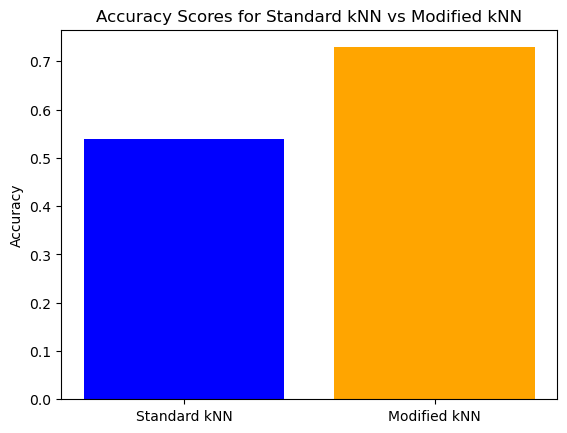

In [57]:
# Prepare the data for plotting
accuracy_results = {
    "Standard kNN": knn_report['accuracy'],
    "Modified kNN": modified_knn_report['accuracy']
}
#Plotting the accuracy values

plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Standard kNN vs Modified kNN')


Text(0.5, 1.0, 'Weighted Average F1 scores for Standard kNN vs Modified kNN')

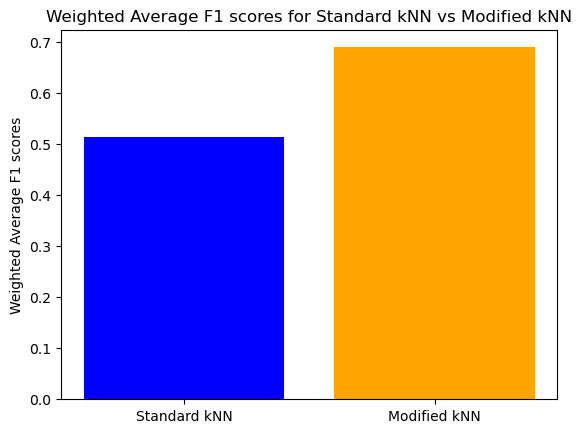

In [58]:
f1_ModifiedKnn  = modified_knn_report['weighted avg']['f1-score']
#print(f1_ModifiedKnn)
f1_Knn  = knn_report['weighted avg']['f1-score']
#print(f1_Knn)

# Prepare the data for plotting
F1_results = {
    "Standard kNN": f1_Knn,
    "Modified kNN": f1_ModifiedKnn
}
#Plotting the weighted avg F1 values
plt.bar(F1_results.keys(), F1_results.values(), color=['blue', 'orange'])
plt.ylabel('Weighted Average F1 scores')
plt.title('Weighted Average F1 scores for Standard kNN vs Modified kNN')

## Decision Tree & comparison

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [61]:
# Implement Decision Tree Classifier
X_train, X_test, y_train, y_test =train_test_split(sample_2.data,sample_2.target,test_size=0.20,random_state=4234) 
clf = DecisionTreeClassifier(random_state=214)

# Fit the model
fit = clf.fit(X_train, y_train)

In [62]:
# Make predictions
y_pre = fit.predict(X_test)
y_pre

array([7, 5, 6, 7, 5, 7, 6, 5, 5, 5, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 4, 5, 6, 5, 5, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 5,
       6, 6, 7, 5, 6, 7, 6, 5, 6, 5, 6, 6, 4, 7, 6, 6, 5, 7, 8, 6, 7, 6,
       4, 8, 7, 6, 5, 7, 6, 7, 6, 7, 7, 6, 6, 7, 8, 7, 5, 7, 5, 6, 5, 7,
       6, 6, 6, 6, 8, 6, 6, 7, 6, 6, 6, 7])

Decision Tree Confusion Matrix:

[[ 0  0  0  1  0  0]
 [ 0  1  3  1  1  0]
 [ 0  1 11  8  3  1]
 [ 0  2  6 28  9  1]
 [ 0  0  2 10  8  0]
 [ 0  0  0  1  0  2]]


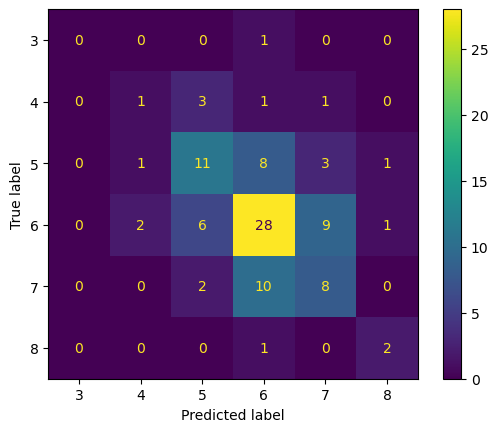

In [63]:
# Evaluate the Decision Tree classifier
cm = confusion_matrix(y_test, y_pre)
print("Decision Tree Confusion Matrix:\n")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

In [64]:
print("Decision Tree Classification Report:\n")
print(classification_report(y_test,y_pre))

Decision Tree Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.17      0.20         6
           5       0.50      0.46      0.48        24
           6       0.57      0.61      0.59        46
           7       0.38      0.40      0.39        20
           8       0.50      0.67      0.57         3

    accuracy                           0.50       100
   macro avg       0.37      0.38      0.37       100
weighted avg       0.49      0.50      0.49       100



In [65]:
# Create the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [66]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5,8, 10],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score: 0.56


[[ 0  0  1  0  0  0]
 [ 0  1  3  1  1  0]
 [ 0  0 14 10  0  0]
 [ 0  0  9 33  4  0]
 [ 0  0  0 15  5  0]
 [ 0  0  0  1  1  1]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.17      0.29         6
           5       0.52      0.58      0.55        24
           6       0.55      0.72      0.62        46
           7       0.45      0.25      0.32        20
           8       1.00      0.33      0.50         3

    accuracy                           0.54       100
   macro avg       0.59      0.34      0.38       100
weighted avg       0.56      0.54      0.51       100



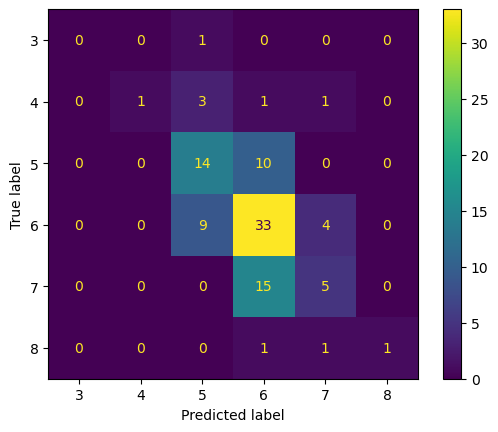

In [67]:
# Use the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_).plot();


print("\nClassification Report:")
print(classification_report(y_test, y_pred))
rf_report = classification_report(y_test, y_pred,output_dict=True)


Text(0.5, 1.0, 'Accuracy Scores for Standard kNN vs RF Decision Tree')

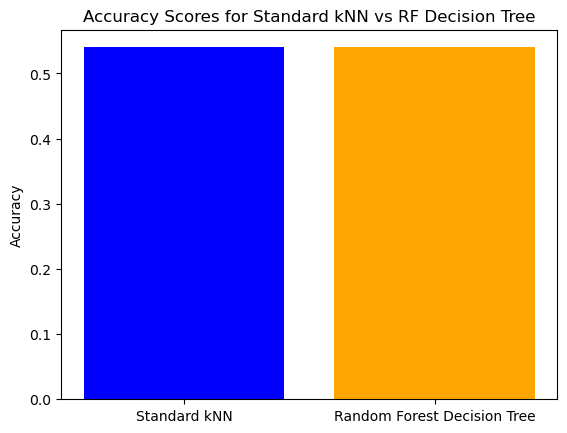

In [68]:
# Prepare the data for plotting accuracy
accuracy_results = {
    "Standard kNN": knn_report['accuracy'],
    "Random Forest Decision Tree": rf_report['accuracy']
}
#Plotting the accuracy values

plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Standard kNN vs RF Decision Tree')


Text(0.5, 1.0, 'Weighted Average F1 scores for Standard kNN vs RF Decision Tree')

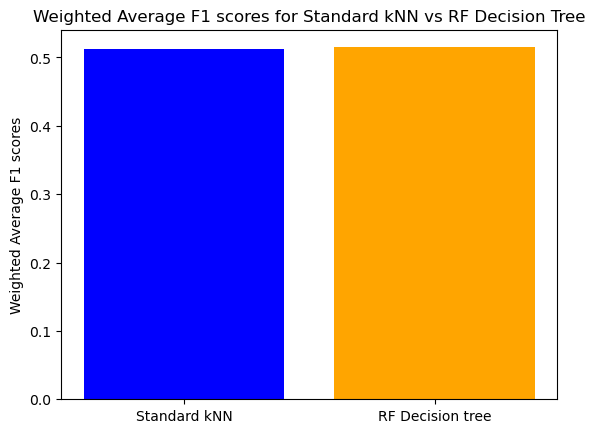

In [69]:
# Prepare the data for plotting weighted F1 score
f1_dt  = rf_report['weighted avg']['f1-score']
f1_Knn  = knn_report['weighted avg']['f1-score']


# Prepare the data for plotting
F1_results = {
    "Standard kNN": f1_Knn,
    "RF Decision tree": f1_dt
}
#Plotting the weighted avg F1 values
plt.bar(F1_results.keys(), F1_results.values(), color=['blue', 'orange'])
plt.ylabel('Weighted Average F1 scores')
plt.title('Weighted Average F1 scores for Standard kNN vs RF Decision Tree')

# Task 3: Clustering

In [73]:
sample_3 = data.sample(n= 300,random_state=1) # Creating a random sample of 200 observations

In [74]:
sample_3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2422,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5
4226,6.0,0.330,0.26,5.1,0.051,16.0,119.0,0.99416,3.15,0.41,9.2,5
1240,7.3,0.180,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.4,6
2547,6.6,0.240,0.24,8.6,0.034,25.0,135.0,0.99582,3.33,0.59,10.3,6
2795,6.3,0.250,0.22,3.3,0.048,41.0,161.0,0.99256,3.16,0.50,10.5,6


In [75]:
sample_3.shape

(300, 12)

In [76]:
sample_3.to_csv('S3991481-A2SampleThree_draft.csv',index=False) #Exporting the sample into a csv file

In [77]:
sample_3.isna().sum() # Checking fro any missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## k-Means 

In [79]:
#Importing packages

In [80]:
from sklearn import cluster
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import accuracy_score

In [81]:
# No of samples
n_sample = len(sample_3)
n_sample

300

In [82]:
sample_3.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [83]:
#Considering only the features
X = sample_3.drop("quality", axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2422,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2
4226,6.0,0.330,0.26,5.1,0.051,16.0,119.0,0.99416,3.15,0.41,9.2
1240,7.3,0.180,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.4
2547,6.6,0.240,0.24,8.6,0.034,25.0,135.0,0.99582,3.33,0.59,10.3
2795,6.3,0.250,0.22,3.3,0.048,41.0,161.0,0.99256,3.16,0.50,10.5


In [84]:
#Build the model
model = cluster.KMeans(n_clusters = 8, random_state=141234)

#Fitting the model
fit = model.fit(X)

#The cluster labels of X are predicted by taking X as input.
X["cluster"] = fit.predict(X)

In [85]:
# Adding back the quality column to compare the predictions
X["quality"] = sample_3.quality
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster,quality
2422,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,3,5
4226,6.0,0.330,0.26,5.1,0.051,16.0,119.0,0.99416,3.15,0.41,9.2,4,5
1240,7.3,0.180,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.4,0,6
2547,6.6,0.240,0.24,8.6,0.034,25.0,135.0,0.99582,3.33,0.59,10.3,1,6
2795,6.3,0.250,0.22,3.3,0.048,41.0,161.0,0.99256,3.16,0.50,10.5,0,6


In [86]:
#placeholder for a comparison count
X["c"] = "count"
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster,quality,c
2422,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,3,5,count
4226,6.0,0.330,0.26,5.1,0.051,16.0,119.0,0.99416,3.15,0.41,9.2,4,5,count
1240,7.3,0.180,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.4,0,6,count
2547,6.6,0.240,0.24,8.6,0.034,25.0,135.0,0.99582,3.33,0.59,10.3,1,6,count
2795,6.3,0.250,0.22,3.3,0.048,41.0,161.0,0.99256,3.16,0.50,10.5,0,6,count


In [87]:
clustering_result = X[["cluster", "quality", "c"]].groupby(["cluster","quality"]).agg("count")
clustering_result

c
cluster quality    
0       4         2
        5        12
        6        14
        7         4
        8         1
1       5        16
        6        18
        7        18
        8         1
2       4         2
        5         6
        6        22
        7        13
3       5         9
        6        11
4       4         2
        5        19
        6        27
        7        13
        8         3
5       5        15
        6        13
        7         2
6       5        14
        6        29
        7         3
        8         2
7       4         2
        5         3
        6         3
        7         1

In [88]:
#Displaying the confusion matrix
print('Confusion Matrix: Wine Quality vs Cluster Labels')
conf_matrix_data = clustering_result.reset_index().pivot(index='quality', columns='cluster', values='c').fillna(0)
conf_matrix_data


Confusion Matrix: Wine Quality vs Cluster Labels


cluster,0,1,2,3,4,5,6,7
quality,,,,,,,,
4,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0
5,12.0,16.0,6.0,9.0,19.0,15.0,14.0,3.0
6,14.0,18.0,22.0,11.0,27.0,13.0,29.0,3.0
7,4.0,18.0,13.0,0.0,13.0,2.0,3.0,1.0
8,1.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0


In [89]:
# Drop the 'quality' column (the target variable) and scale the data for K-Means
X = sample_3.drop("quality", axis=1)

# Standardizing the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Implement K-Means
kmeans = cluster.KMeans(n_clusters=8, random_state=42)

# Fitting the model
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_



In [90]:
#Evaluating the Model
# 1. Inertia (Within-Cluster Sum of Squares)
inertia = kmeans.inertia_

# 2. Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

# 3. Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, cluster_labels)

# 4. Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_scaled, cluster_labels)

# Print the evaluation metrics
print(f"Inertia (WCSS): {inertia}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")


Inertia (WCSS): 1791.4116424965032
Silhouette Score: 0.11997801572419244
Davies-Bouldin Index: 1.9040966690273189
Calinski-Harabasz Index: 35.128545710715244


Text(0, 0.5, 'volatile acidity')

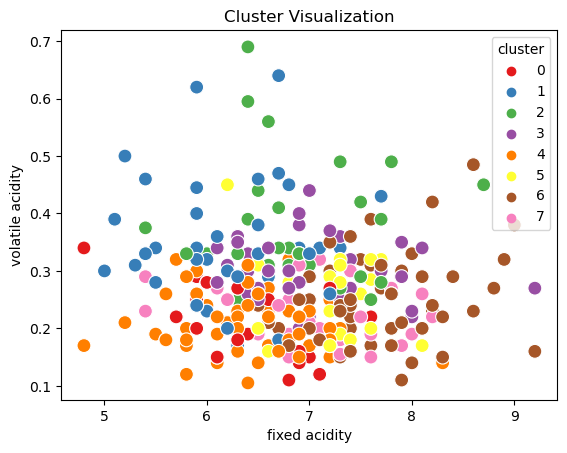

In [91]:
# Visualize the Results using two features
# Add cluster labels to the original data for comparison
sample_3['cluster'] = cluster_labels

# Example: Visualizing clusters based on the first two features (for simplicity)
sns.scatterplot(x=sample_3.iloc[:, 0], y=sample_3.iloc[:, 1], hue=sample_3['cluster'], palette='Set1', s=100)
plt.title('Cluster Visualization')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')

    k        Inertia  Silhouette Score  Accuracy
0   1  604132.011223               NaN  0.000000
1   2  231657.938261          0.503896  0.000000
2   3  148842.521357          0.414759  0.000000
3   4  108445.819395          0.386401  0.000000
4   5   90530.491375          0.347078  0.000000
5   6   77987.606269          0.341612  0.020000
6   7   67557.243408          0.338849  0.106667
7   8   60384.425539          0.322427  0.156667
8   9   54142.701644          0.303411  0.060000
9  10   48156.504257          0.326551  0.093333


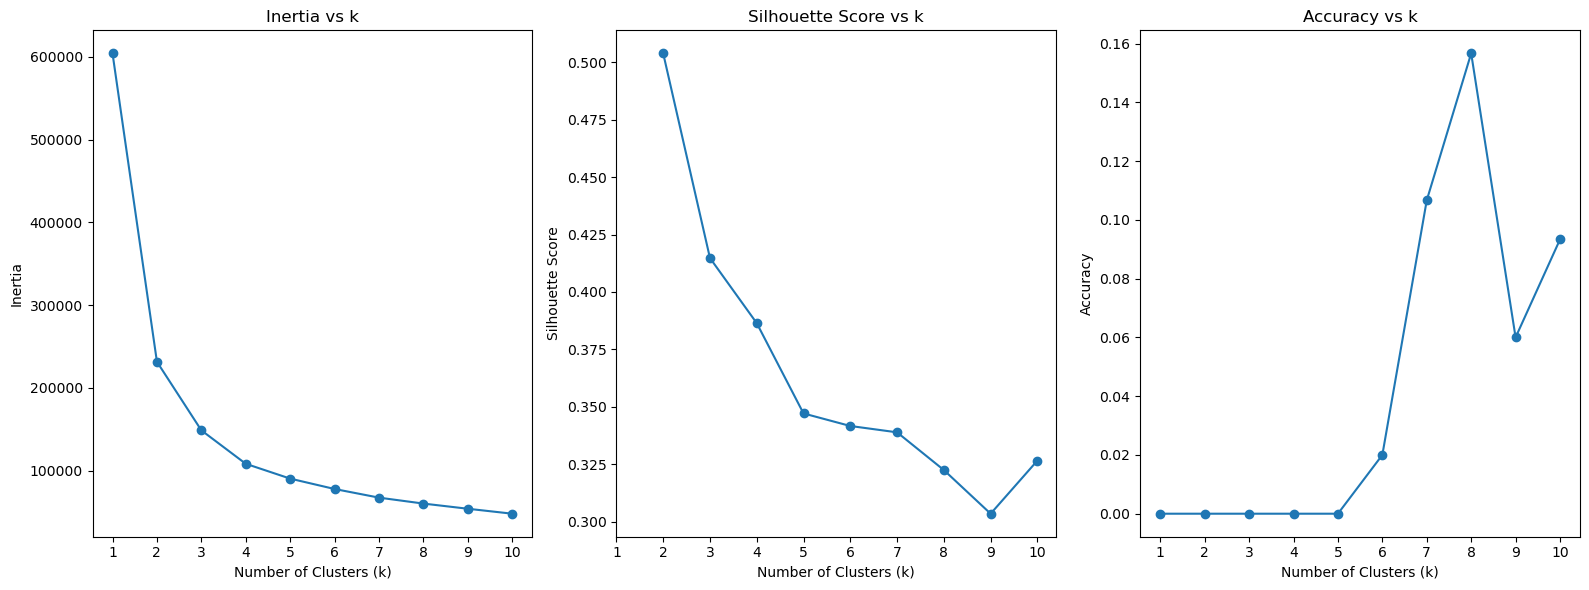

In [92]:
# Define a range of k values
k_values = range(1, 11)

# Initialize lists to store the metrics
inertia_list = []
silhouette_list = []
accuracy_list = []

# Loop through the k values
for k in k_values:
    # Fit the KMeans model
    model = cluster.KMeans(n_clusters=k, random_state=141234)
    cluster_labels = model.fit_predict(X)
    
    # Calculate inertia
    inertia = model.inertia_
    inertia_list.append(inertia)
    
    # Calculate silhouette score
    if k > 1:  # Silhouette score is not defined for k=1
        silhouette = silhouette_score(X, cluster_labels)
        silhouette_list.append(silhouette)
    else:
        silhouette_list.append(None) 
    
    # Calculate accuracy score
    actual_quality = sample_3['quality'].astype(int) 
    accuracy = accuracy_score(actual_quality, cluster_labels)
    accuracy_list.append(accuracy)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'k': k_values,
    'Inertia': inertia_list,
    'Silhouette Score': silhouette_list,
    'Accuracy': accuracy_list
})

# Display the results
print(results)

# Step 4: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Plot Inertia
plt.subplot(1, 3, 1)
plt.plot(results['k'], results['Inertia'], marker='o')
plt.title('Inertia vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(results['k'])

# Plot Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(results['k'][1:], results['Silhouette Score'][1:], marker='o')  # Start from k=2
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(results['k'])

# Plot Accuracy
plt.subplot(1, 3, 3)
plt.plot(results['k'], results['Accuracy'], marker='o')
plt.title('Accuracy vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Accuracy')
plt.xticks(results['k'])

plt.tight_layout()
plt.show()

In [93]:
#Implement K-Means when cluster =2 for scaled data
kmeans = cluster.KMeans(n_clusters=2, random_state=424235)

# Fitting the model
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

In [94]:
#Evaluating the Model
# 1. Inertia (Within-Cluster Sum of Squares)
inertia_kmeans = kmeans.inertia_

# 2. Silhouette Score
silhouette_avg_kmeans = silhouette_score(X, cluster_labels)

# 3. Davies-Bouldin Index
db_index_kmeans = davies_bouldin_score(X, cluster_labels)

# 4. Calinski-Harabasz Index
ch_index_kmeans = calinski_harabasz_score(X, cluster_labels)

print(f"k-Means Silhouette Score: {silhouette_avg_kmeans}")
print(f"k-Means Davies-Bouldin Index: {db_index_kmeans}")
print(f"k-Means Calinski-Harabasz Index: {ch_index_kmeans}")
print(f"k-Means Inertia: {inertia_kmeans}")

k-Means Silhouette Score: 0.3306168356218988
k-Means Davies-Bouldin Index: 0.9650408488974906
k-Means Calinski-Harabasz Index: 224.39115659559062
k-Means Inertia: 2560.798988186942


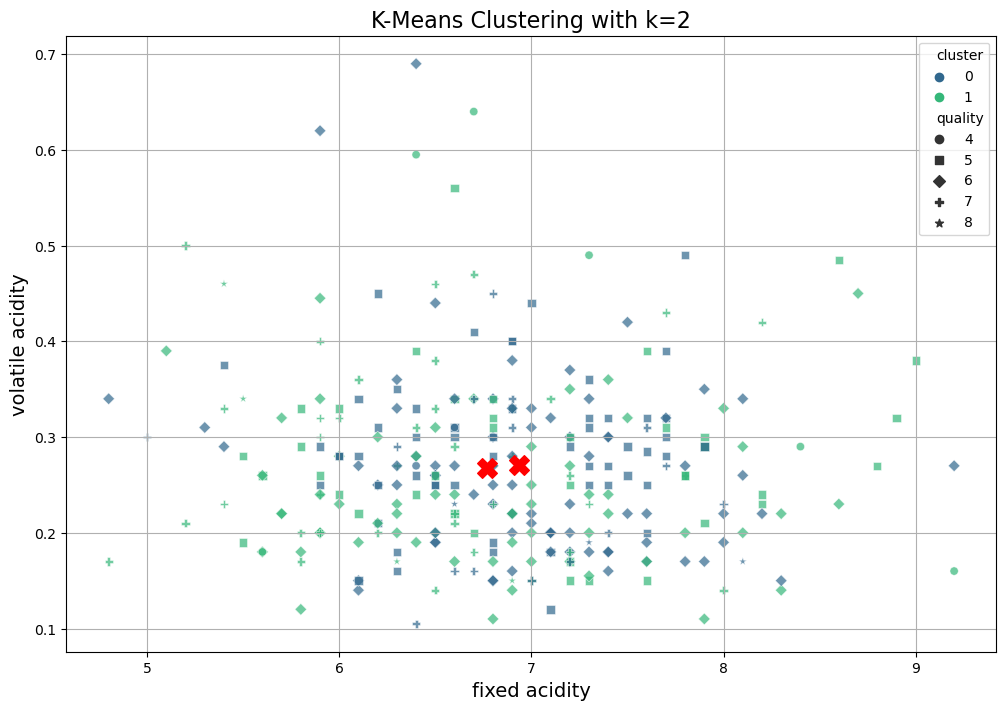

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load your dataset (assuming `sample_3` is your DataFrame)
# sample_3 = pd.read_csv('path_to_your_csv')  # Uncomment and specify your file path

# For demonstration, assume `X` is already defined as the features without the 'quality' column
X = sample_3.drop("quality", axis=1)

# Fit KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=141234)
sample_3['cluster'] = kmeans.fit_predict(X)

# Get cluster centroids
centroids = kmeans.cluster_centers_


# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sample_3, x='fixed acidity', y='volatile acidity', hue='cluster', palette='viridis', style='quality', markers=['o', 's', 'D', 'P', '*', 'X', 'P', '^'], alpha=0.7)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Centroids', marker='X')

plt.title('K-Means Clustering with k=2', fontsize=16)
plt.xlabel('fixed acidity', fontsize=14)
plt.ylabel('volatile acidity', fontsize=14)
#plt.ylim(0.9, 1.1)
plt.grid()
plt.show()


## DBSCAN & comparison 

In [97]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

In [98]:
# Drop the 'quality' column (the target variable) and scale the data for K-Means
X = sample_3.drop("quality", axis=1)

# Standardizing the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
# DBSCAN algorithm
dbscan = DBSCAN(eps=0.3, min_samples=3) 
dbscan.fit(X_scaled)

DBSCAN(eps=0.3, min_samples=3)

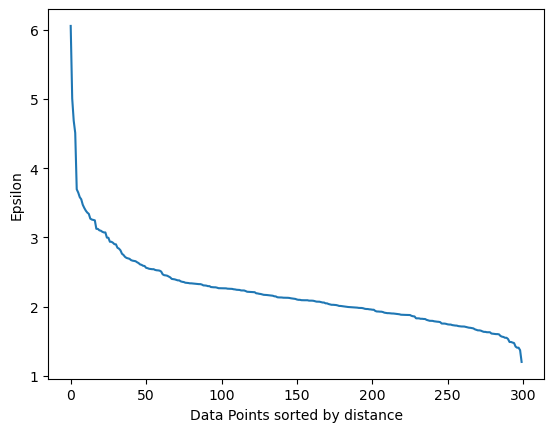

In [100]:
# Using k distance graph to find the eps value
# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances and plot
distances = np.sort(distances[:, 3], axis=0) 
distances = distances[::-1]
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [101]:
# rerunning the model
dbs_2 = cluster.DBSCAN(eps=3.5,metric='manhattan',min_samples=4)
dbs_fit = dbs_2.fit(X_scaled)
labels_2 = dbs_fit.labels_


In [102]:
labels_2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [103]:

# Silhouette Score
silhouette = silhouette_score(X_scaled, labels_2)
print(f"Silhouette Score: {silhouette}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, labels_2)
print(f"Davies-Bouldin Index: {db_index}")

#Calinski-Harabasz Index
mask = labels_2 != -1  # Exclude noise points
ch_index = calinski_harabasz_score(X_scaled[mask], labels_2[mask])
print(f"Calinski-Harabasz Index (without noise): {ch_index}")

actual_label = sample_3['quality'] 
ari = adjusted_rand_score(actual_label, labels_2)
print(f"Adjusted Rand Index: {ari}")


Silhouette Score: -0.28686010749753765
Davies-Bouldin Index: 1.8203131810492768
Calinski-Harabasz Index (without noise): 43.274804162321
Adjusted Rand Index: 0.0014870560209963438


In [104]:
X_scaled_df = pd.DataFrame(X_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'cluster']) 


In [105]:
#The cluster labels of X are predicted by taking X as input.
X_scaled_df["cluster"] = labels_2

# Adding back the quality column to compare the predictions
X_scaled_df["quality"] = sample_3.quality.values
X_scaled_df

#placeholder for a comparison count
X_scaled_df["c"] = "count"

#Creating a comparison matrix
clustering_result = X_scaled_df[["cluster", "quality", "c"]].groupby(["cluster","quality"]).agg("count")
clustering_result


c
cluster quality     
-1      4          8
        5         90
        6        134
        7         52
        8          7
 0      5          3
        6          2
 1      5          1
        6          1
        7          2

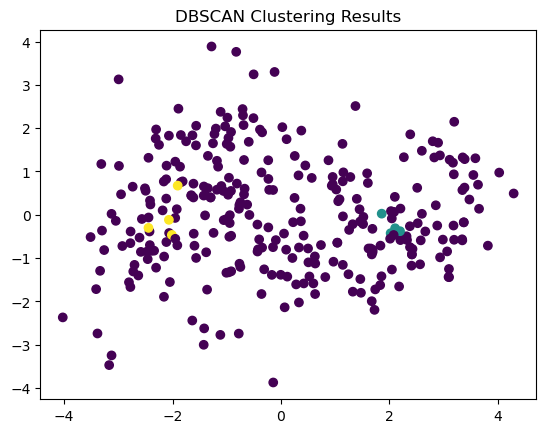

In [214]:
#Visualising the clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_2, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()


In [107]:
#COmparing K means and DBSCAN
results = pd.DataFrame({
    "Method": ["k-Means", "DBSCAN"],
    "Silhouette Score": [silhouette_avg_kmeans, silhouette],
    "Davies-Bouldin Index": [db_index_kmeans, db_index],
    "Calinski-Harabasz Index": [ch_index_kmeans, ch_index],
})
results

,Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,k-Means,0.330617,0.965041,224.391157
1,DBSCAN,-0.286860,1.820313,43.274804


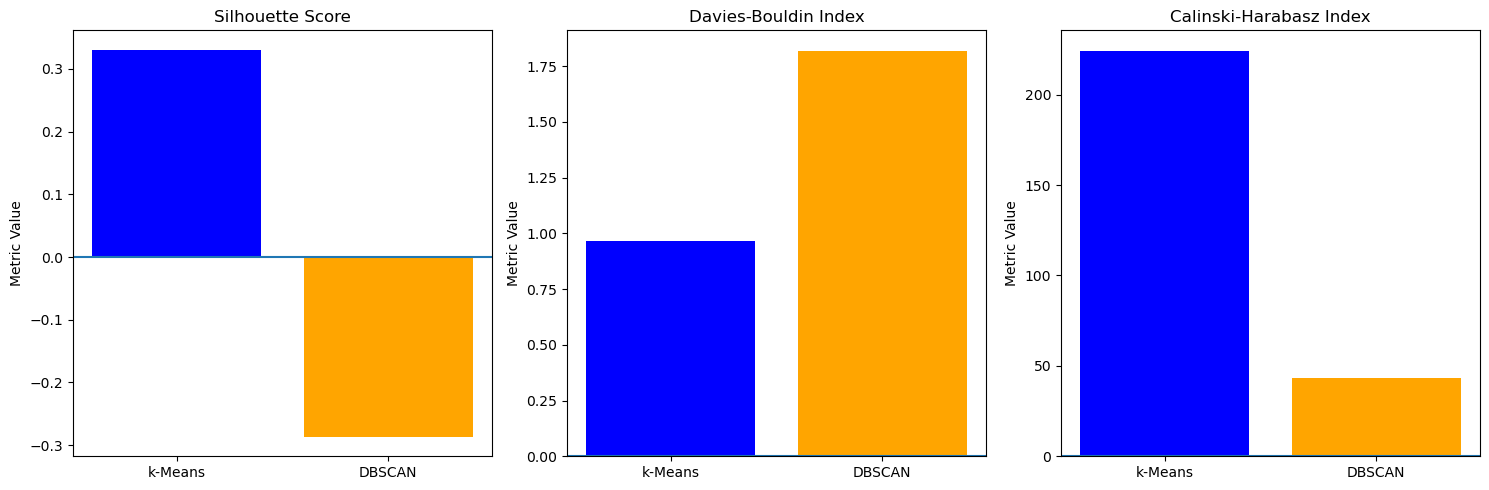

In [108]:
# Plotting metrics in separate graphs
metrics = ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"]

plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, start=1):
    plt.subplot(1, 3, i)
    plt.bar(results["Method"], results[metric], color=['blue', 'orange'])
    plt.title(metric)
    plt.ylabel('Metric Value')
    plt.axhline(0)

plt.tight_layout()
plt.show()